In [112]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [113]:
data = pd.read_csv('Reviews.csv')
#data.head()
data = data.drop(columns=['Id', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'ProfileName'])
data = data.drop(columns=['Summary', 'Text'])
data.head()

,ProductId,UserId,Score
0,B001E4KFG0,A3SGXH7AUHU8GW,5
1,B00813GRG4,A1D87F6ZCVE5NK,1
2,B000LQOCH0,ABXLMWJIXXAIN,4
3,B000UA0QIQ,A395BORC6FGVXV,2
4,B006K2ZZ7K,A1UQRSCLF8GW1T,5


In [114]:
ProdPerUser = Counter(data['UserId'])
UserPerProd = Counter(data['ProductId'])

In [115]:
print(np.sum(np.array(list(ProdPerUser.values())) > 30))
print(np.sum(np.array(list(UserPerProd.values())) > 30))

703
3022


In [116]:
drop_idx = []
for row in data.itertuples():
    prod_id, user_id = row[1], row[2]
    if ProdPerUser[user_id] < 20:
        drop_idx.append(row[0])

data_clean = data.drop(index=drop_idx)
len(data_clean)

68015

In [117]:
ProdPerUser2 = Counter(data_clean['UserId'])
UserPerProd2 = Counter(data_clean['ProductId'])

In [118]:
review_rate_prod = {}
review_rate_user = {}

for val in ProdPerUser2.values():
    review_rate_prod.setdefault(val, 0)
    review_rate_prod[val] += 1
    
for val in UserPerProd2.values():
    review_rate_user.setdefault(val, 0)
    review_rate_user[val] += 1

Text(0.5, 0, 'number of user reviews per product')

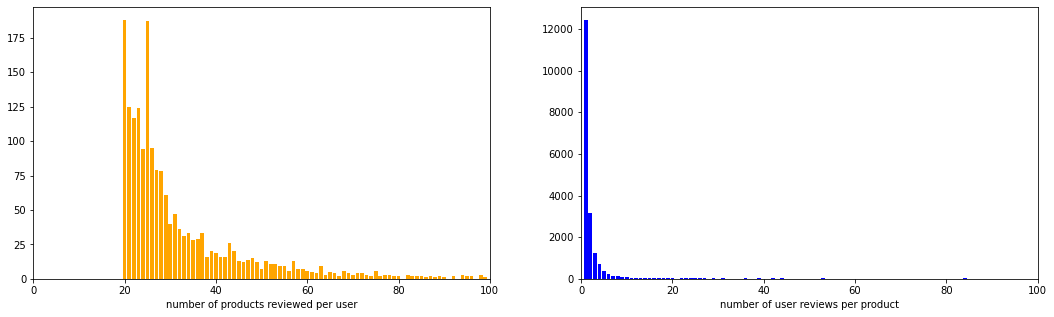

In [119]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
plt.bar(review_rate_prod.keys(), review_rate_prod.values(), color='orange')
plt.xlim([0,100])
plt.xlabel('number of products reviewed per user')

plt.subplot(1,2,2)
plt.bar(review_rate_user.keys(), review_rate_user.values(), color='blue')
plt.xlim([0,100])
plt.xlabel('number of user reviews per product')

In [120]:
review_rate_user[2]

3167

In [121]:
data_clean.to_csv('clean2.csv')